In [6]:
#import
import pandas as pd
import numpy as np

#görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#veri setini yükle
df = pd.read_csv("Student Stress Factors (2).csv")
df.head()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [9]:
df.shape

(520, 6)

In [10]:
df.columns

Index(['Kindly Rate your Sleep Quality 😴',
       'How many times a week do you suffer headaches 🤕?',
       'How would you rate you academic performance 👩‍🎓?',
       'how would you rate your study load?',
       'How many times a week you practice extracurricular activities 🎾?',
       'How would you rate your stress levels?'],
      dtype='object')

In [11]:
df.describe()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,3.125000,2.182692,3.326923,2.750000,2.682692,2.875000
std,1.099023,1.247459,1.061158,1.372381,1.470745,1.357825
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,3.000000,2.000000,3.000000,2.500000,3.000000,3.000000
75%,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [12]:
# eksik değer kontrolü
df.isnull().sum()

Kindly Rate your Sleep Quality 😴                                    0
How many times a week do you suffer headaches 🤕?                    0
How would you rate you academic performance 👩‍🎓?                    0
how would you rate your study load?                                 0
How many times a week you practice extracurricular activities 🎾?    0
How would you rate your stress levels?                              0
dtype: int64

In [13]:
# sütun isimlerini sadeleştirme
df.columns = [
    "sleep_quality",
    "headaches_per_week",
    "academic_performance",
    "study_load",
    "extracurricular_freq",
    "stress_level"
]

# kontrol
df.head()

,sleep_quality,headaches_per_week,academic_performance,study_load,extracurricular_freq,stress_level
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


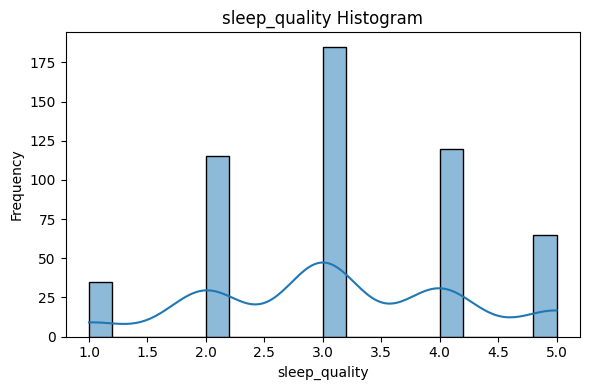

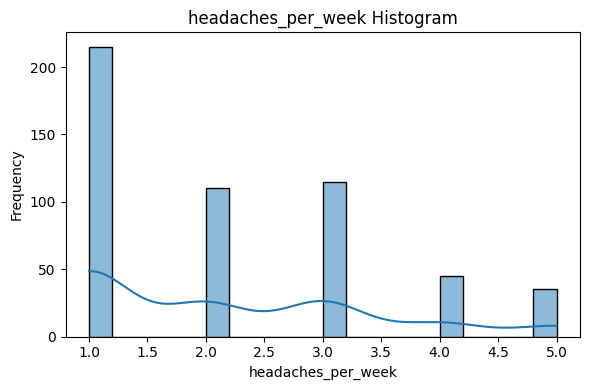

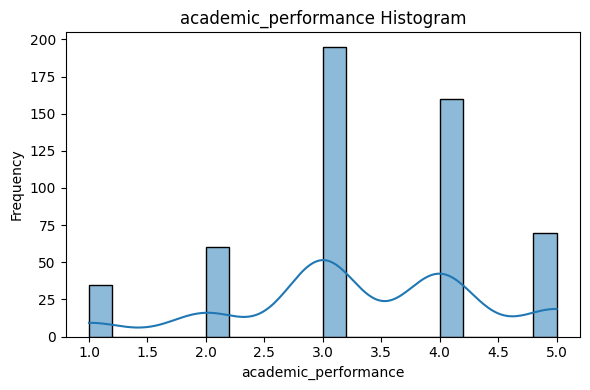

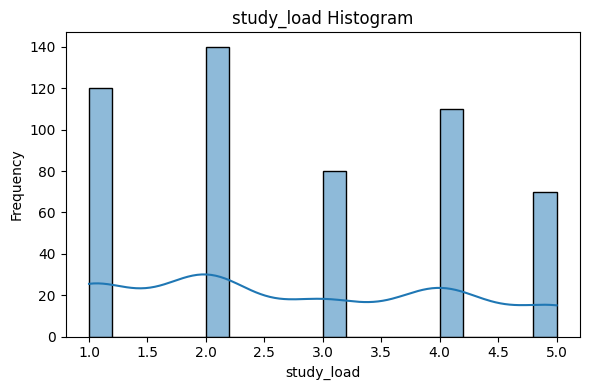

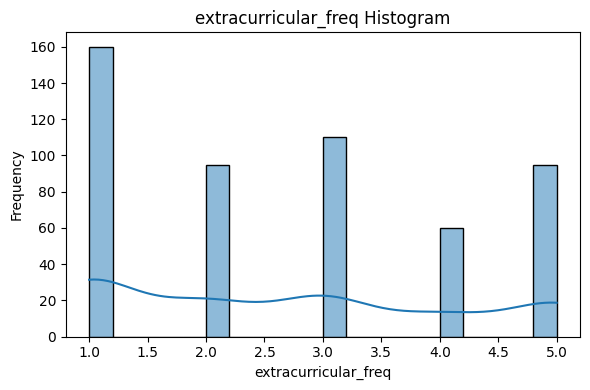

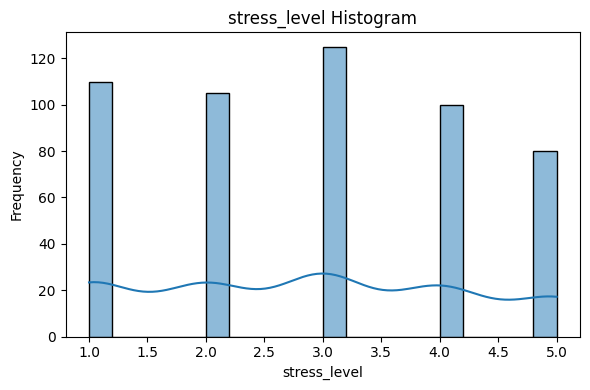

In [14]:
# sayısal değişkenler için histogram
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} Histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

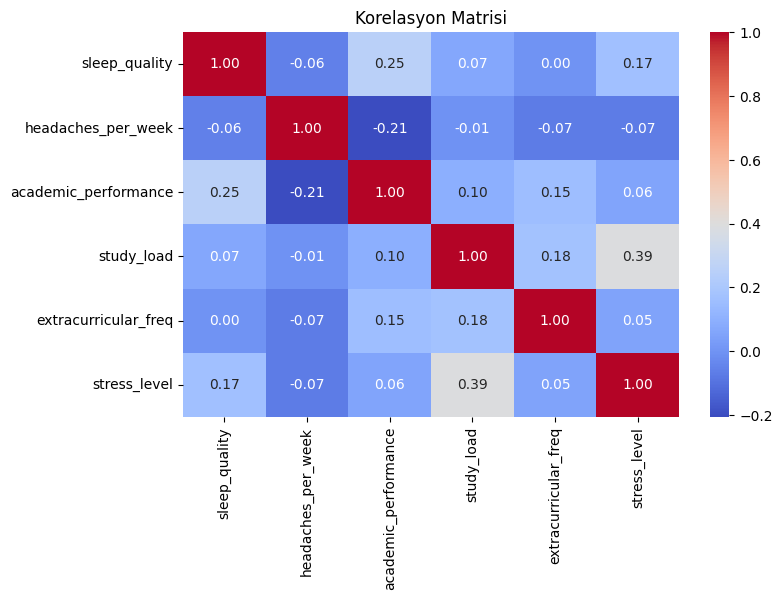

In [15]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

#feature X, target y
X = df.drop("stress_level", axis=1)
y = df["stress_level"]

#dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#classifier modelini kur
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(random_state=42, n_estimators=200)
model.fit(X,y)

#tahmin
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9519230769230769

Classification Report:
               precision    recall  f1-score   support

           1       0.91      1.00      0.95        21
           2       1.00      0.96      0.98        25
           3       0.90      1.00      0.95        19
           4       0.94      0.85      0.89        20
           5       1.00      0.95      0.97        19

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



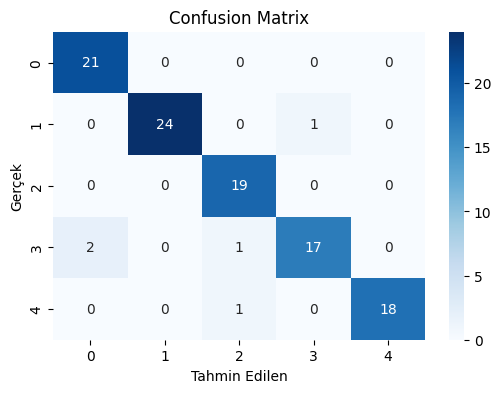

In [20]:
#confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.savefig("images/confusion_matrix.png", dpi=300)
plt.show()

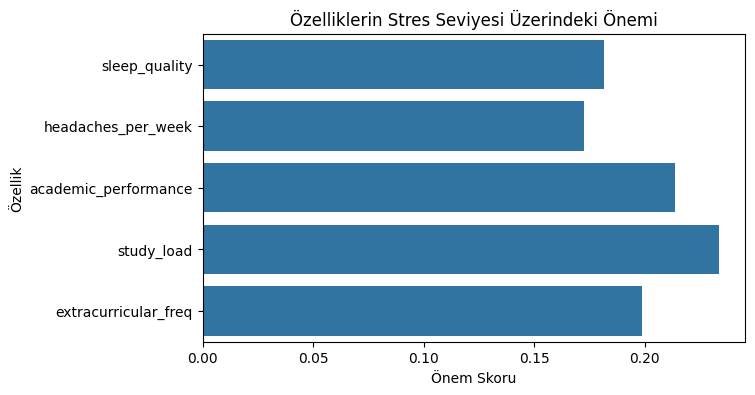

In [19]:
#feature importance
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(7,4))
sns.barplot(x=importances, y=features)
plt.title("Özelliklerin Stres Seviyesi Üzerindeki Önemi")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellik")
plt.savefig("images/feature_importance.png", dpi=300)
plt.show()